In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Veri setinde sütun isimleri yok onun için siteden baz alarak sütunları
isimlendireceğim --- https://archive.ics.uci.edu/dataset/291/airfoil+self+noise

In [39]:
DATA_PATH = '../data/raw/airfoil_self_noise.csv'

In [41]:
column_names = [
    "frequency",
    "attack-angle",
    "chord-length",
    "free-stream-velocity",
    "suction-side-displacement-thickness",
    "scaled-sound-pressure"  # Target
]

In [43]:
df = pd.read_csv(DATA_PATH, names=column_names, header=None, sep='\t')

In [45]:
df.to_csv('../data/airfoil_self_noise_with_headers.csv')

In [47]:
print("First 5 lines:")
print(df.head())

print("\nDataset size:", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nData type and incomplete value analysis:")
print(df.info())
print(df.isnull().sum())

print("\nStatistical summary:")
print(df.describe())

First 5 lines:
   frequency  attack-angle  chord-length  free-stream-velocity  \
0        800           0.0        0.3048                  71.3   
1       1000           0.0        0.3048                  71.3   
2       1250           0.0        0.3048                  71.3   
3       1600           0.0        0.3048                  71.3   
4       2000           0.0        0.3048                  71.3   

   suction-side-displacement-thickness  scaled-sound-pressure  
0                             0.002663                126.201  
1                             0.002663                125.201  
2                             0.002663                125.951  
3                             0.002663                127.591  
4                             0.002663                127.461  

Dataset size: (1503, 6)

Column names: ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', 'suction-side-displacement-thickness', 'scaled-sound-pressure']

Data type and incomplete valu

Histogramlar 

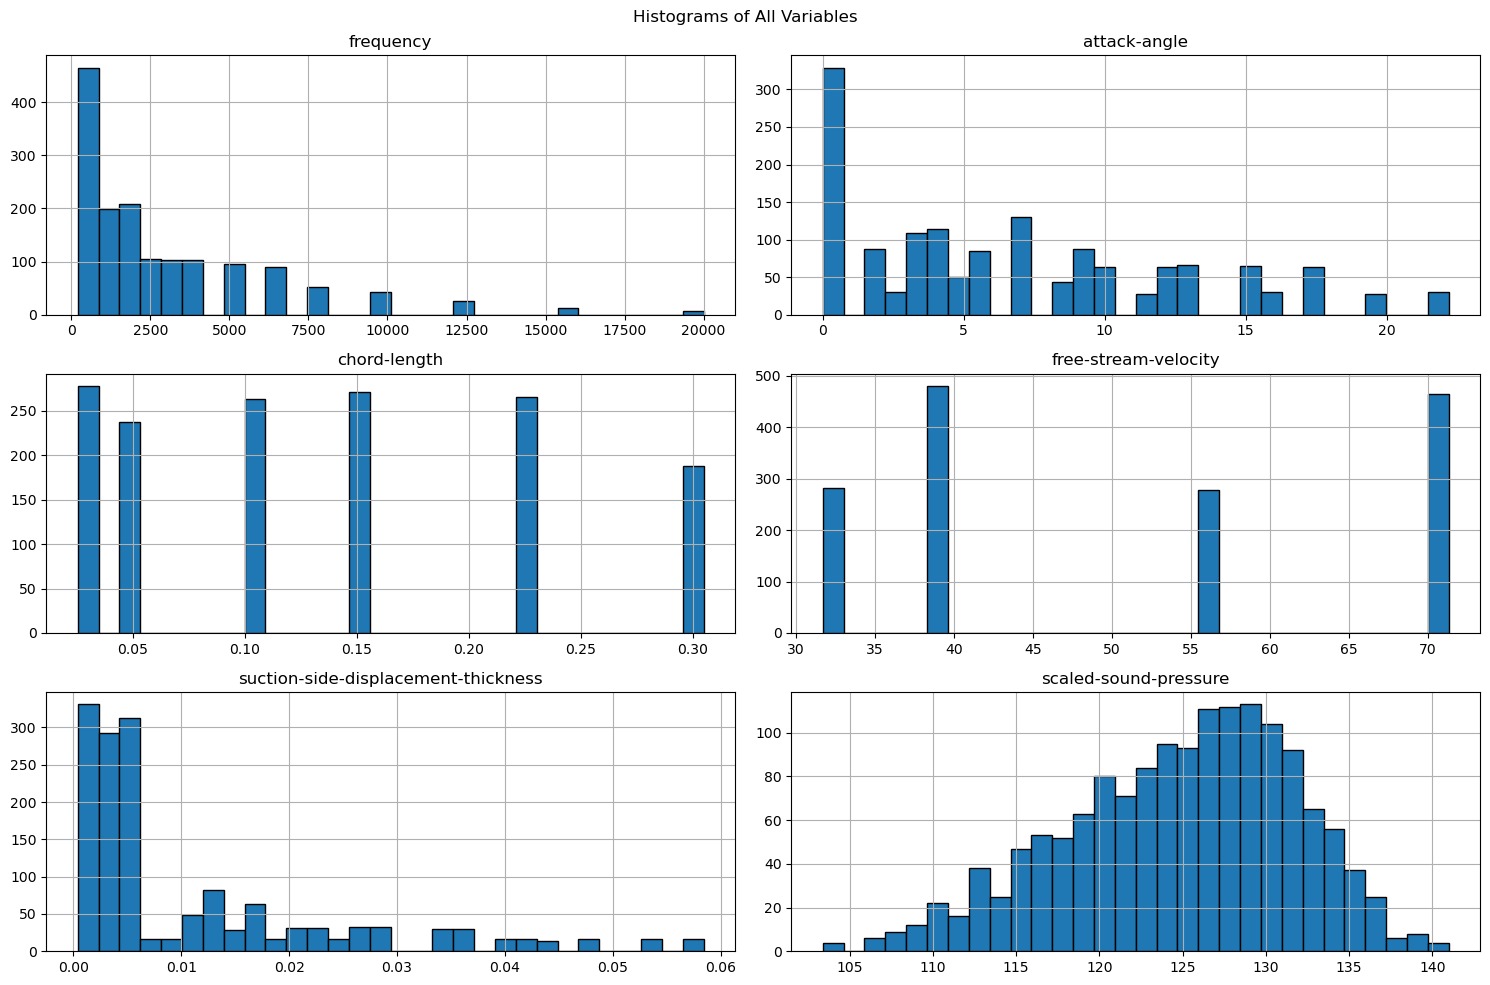

In [50]:
df.hist(bins=30 , figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of All Variables")
plt.tight_layout()
plt.show()

Boxplotlar

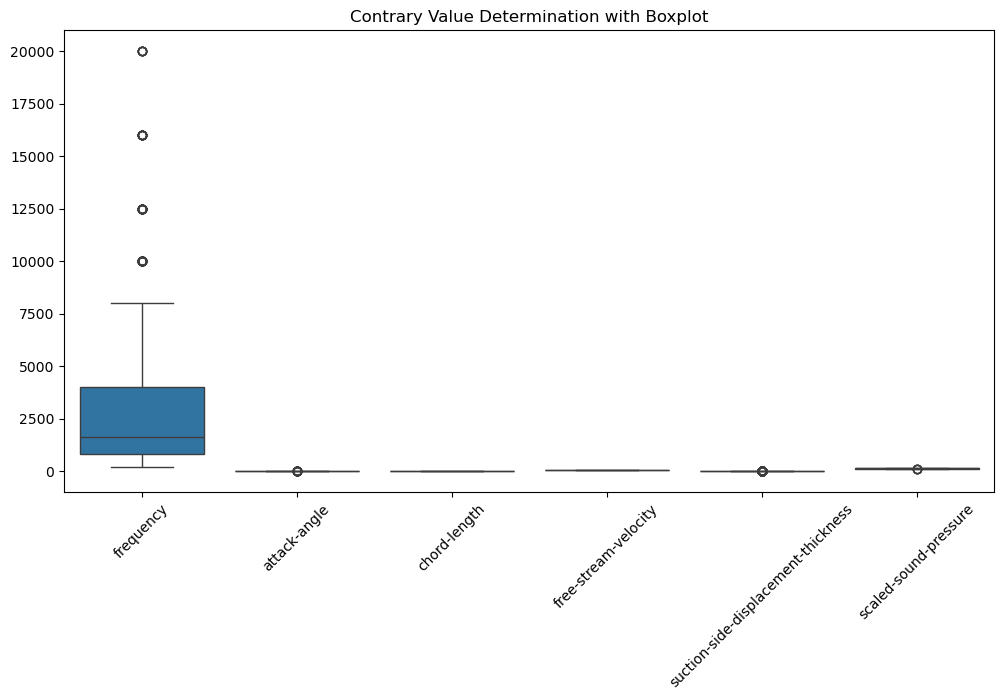

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Contrary Value Determination with Boxplot")
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix and Heat Map (Heatmap)

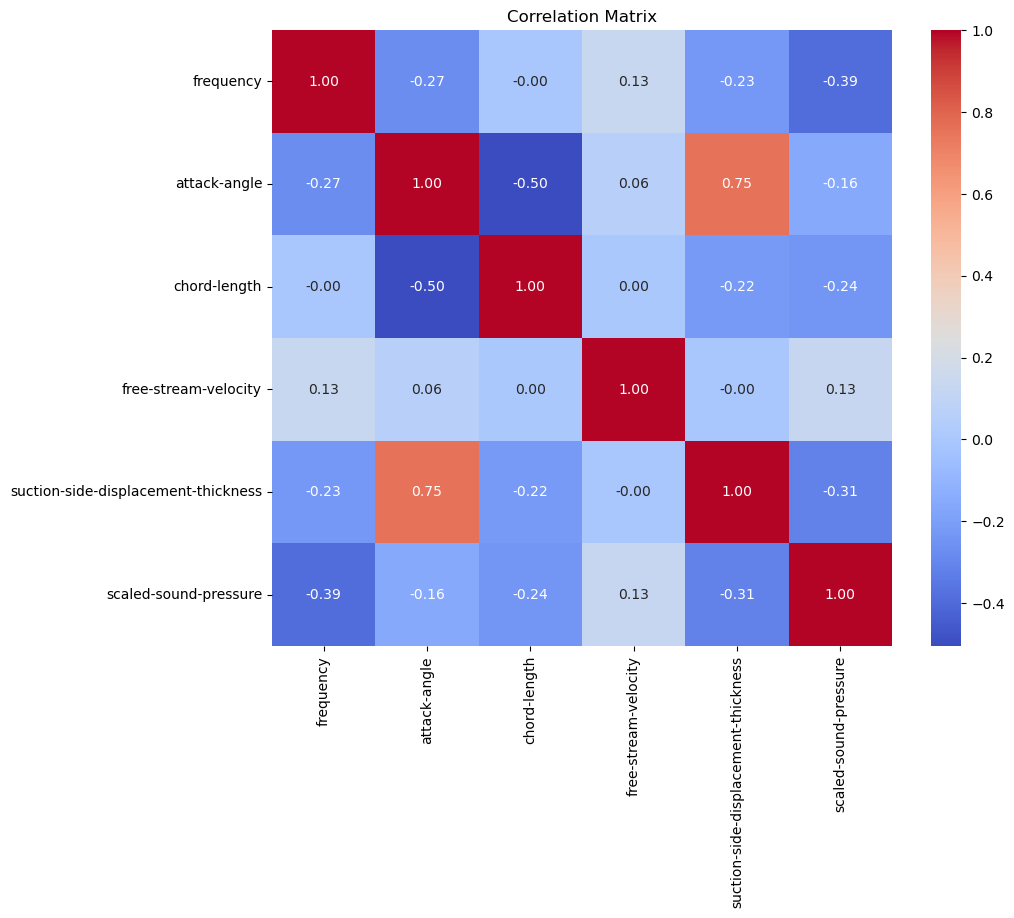

In [56]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Target Analysis

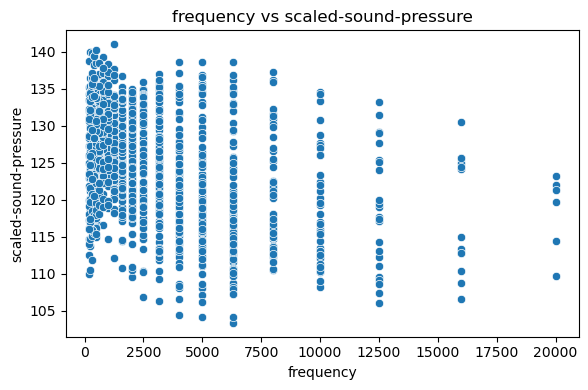

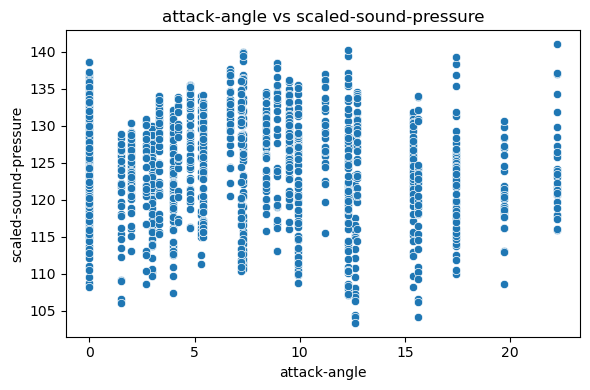

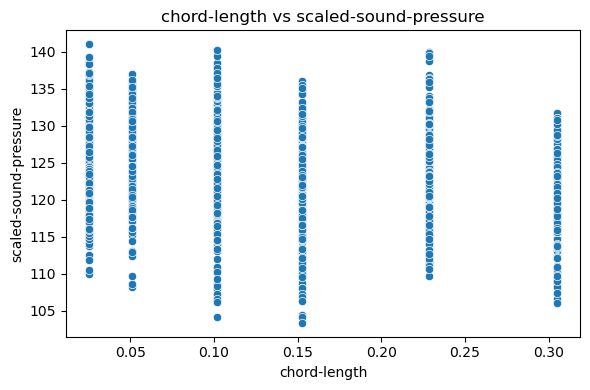

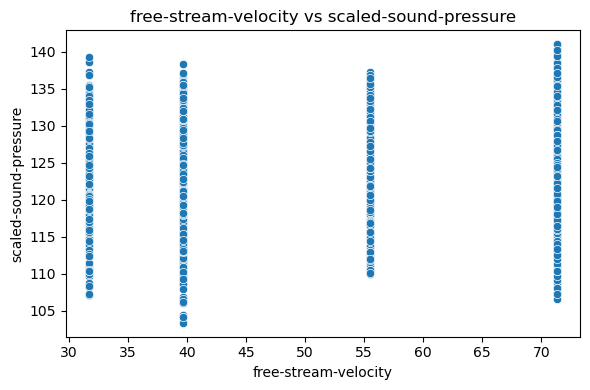

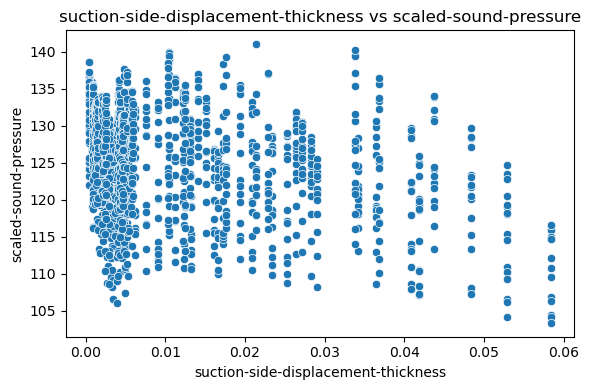

In [59]:
target = "scaled-sound-pressure"

for col in df.columns:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col],y=df[target])
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

## Idolary Value Review (Detailed)

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nNumber of outlier values column-based:")
print(outliers.sum())


Number of outlier values column-based:
frequency                               86
attack-angle                            30
chord-length                             0
free-stream-velocity                     0
suction-side-displacement-thickness    124
scaled-sound-pressure                    4
dtype: int64


## Pairplot

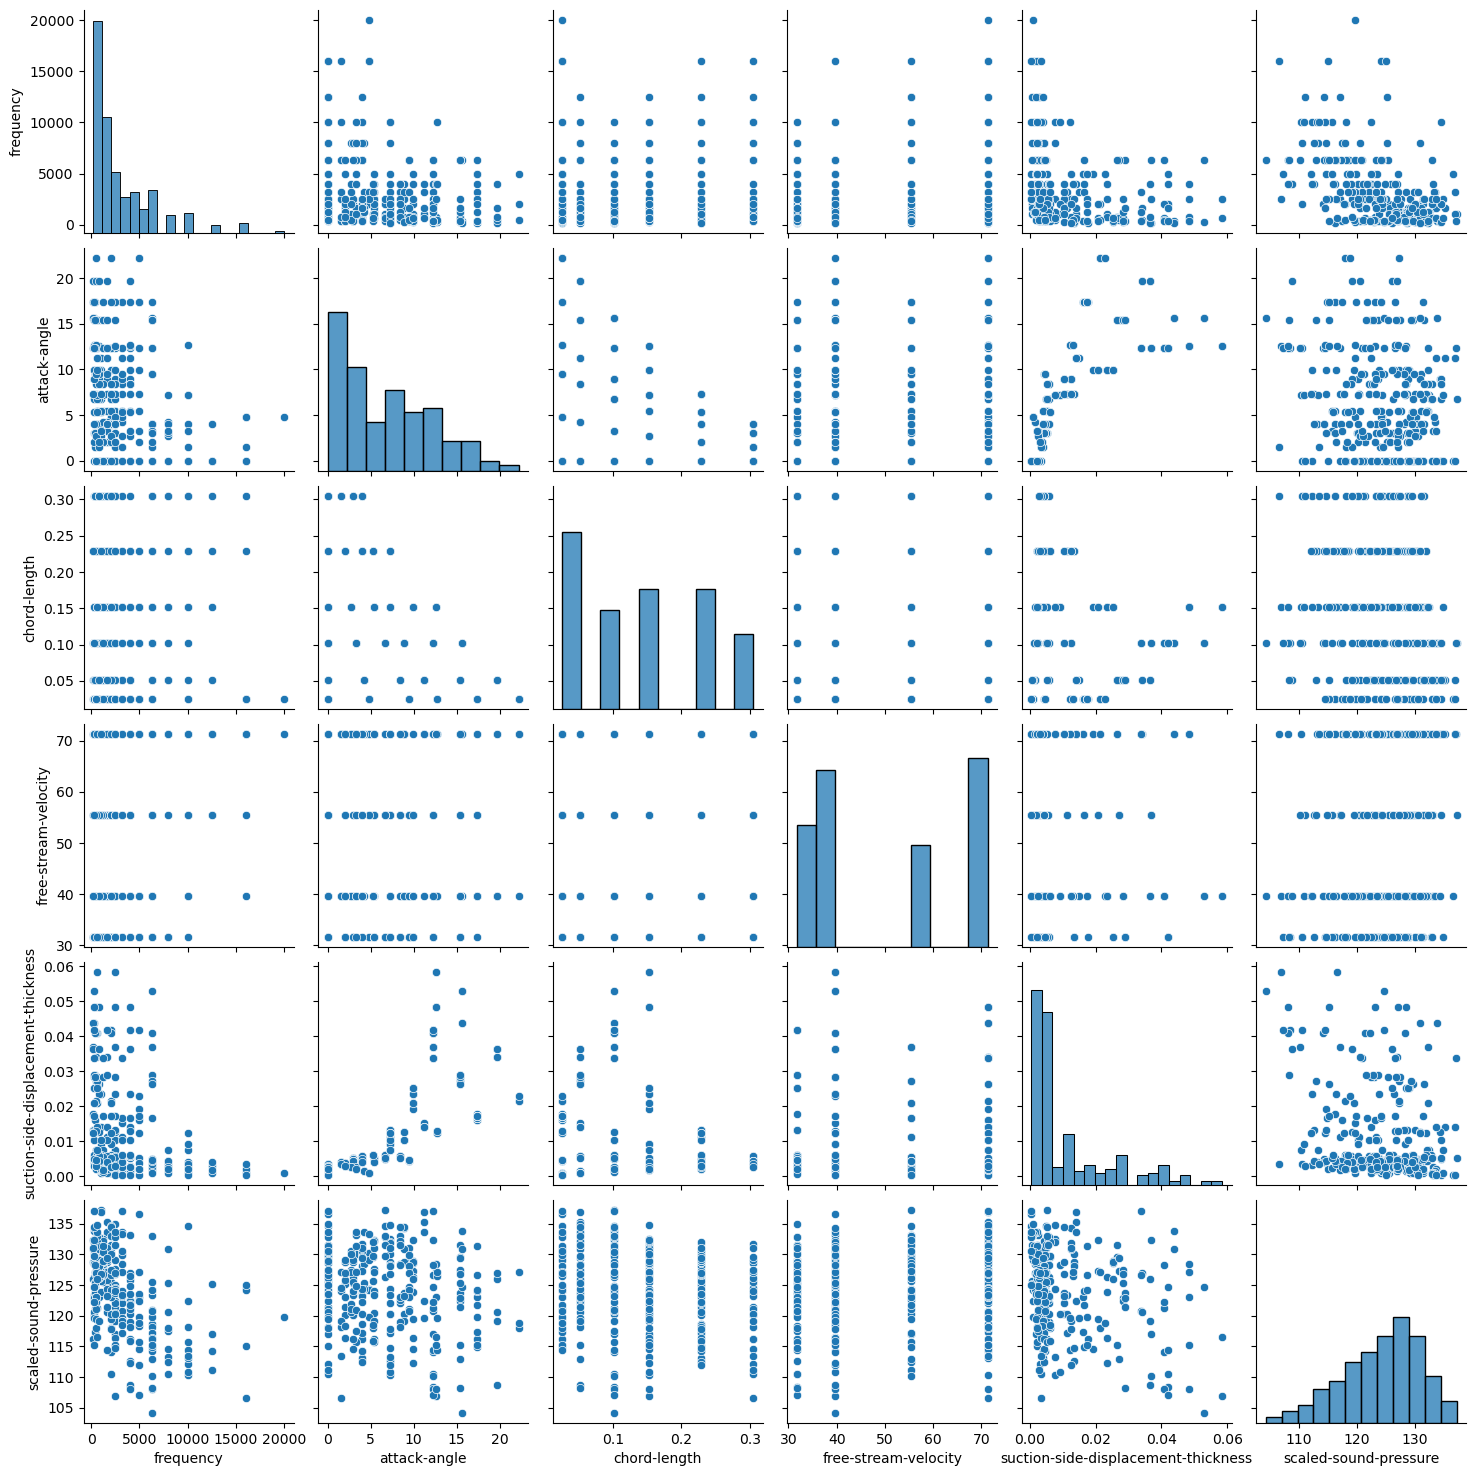

In [65]:
sns.pairplot(df.sample(300))
plt.show()

## 1. Data Exploration Summary

### General Overview of the Dataset

- **Dataset Name:** Airfoil Self-Noise Dataset  
- **Source:** UCI Machine Learning Repository  
- **Total Number of Observations (Rows):** 1503  
- **Total Number of Features (Columns):** 6  
- **Problem Type:** Regression  
- **Target Variable:** `scaled-sound-pressure`  
- **Objective:** To predict the sound pressure level emitted from airfoil surfaces using aerodynamic parameters.

### Features

| Feature Name                          | Description                                                                 | Unit        |
|--------------------------------------|-----------------------------------------------------------------------------|-------------|
| frequency                            | Sound frequency                                                             | Hz          |
| angle_of_attack                      | Angle of attack (the angle between the incoming airflow and airfoil surface) | Degree      |
| chord_length                         | Chord length of the airfoil                                                 | Meters (m)  |
| free_stream_velocity                 | Free-stream velocity                                                        | m/s         |
| suction_side_displacement_thickness | Displacement thickness on the suction side                                  | Meters (m)  |
| scaled_sound_pressure                | Scaled sound pressure level (target variable)                               | Decibels (dB) |

### Missing Value Analysis

- No missing (NaN) values were found in the dataset.

### Summary Statistics

- Descriptive statistics were calculated for all numerical columns:
  - Minimum, maximum, mean, standard deviation, and quartiles (25%, 50%, 75%) were evaluated.
- The average value of the target variable `scaled_sound_pressure` is approximately **130.8 dB**, with a standard deviation of **4.4 dB**.
- Some features may contain potential outliers, which will be examined in more detail during later stages of the analysis.

### Correlation Analysis

- A correlation matrix was computed to understand the relationships between features.
- The feature most negatively correlated with `scaled_sound_pressure` is `free_stream_velocity`, while the most positively correlated feature is `frequency`.

### Observational Findings

- An increasing trend in `scaled_sound_pressure` is observed as `frequency` increases.
- A decreasing trend in sound pressure is seen as `free_stream_velocity` increases.
- Some variables may have nonlinear relationships, which will be considered in model selection and feature engineering steps.
